In [27]:
import geopandas as gpd
import rasterio
import rasterio.features
import rasterstats
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [28]:
# Define the latitude and longitude of the point
lat = -6.24047  # Example latitude
lon = 106.8302  # Example longitude

# Create a Point geometry object from the latitude and longitude
point = Point(lon, lat)


In [121]:
# Load the population raster data
pop_raster = rasterio.open('C:Users/mwarizmiwafiq/Downloads/Compressed/landscan-global-2021-assets/landscan-global-2021.tif')

other_shapefile = gpd.read_file('../data/idn_bnd_adm0_bps_2017_a.shp')


In [127]:
point_gdf = gpd.GeoDataFrame(geometry=[point], crs="EPSG:4326")

point_gdf = point_gdf.to_crs(3857)

point_gdf['geometry'] = point_gdf['geometry'].buffer(2500)

buffer_gdf = point_gdf.to_crs(4326)

print(buffer_gdf)


                                            geometry
0  POLYGON ((106.85266 -6.24047, 106.85255 -6.242...


In [128]:
array = pop_raster.read(1)
affine = pop_raster.transform
nodata = pop_raster.nodata

zonal = zonal_stats(buffer_gdf, array, affine=affine, nodata=nodata, stats=[
                    'min', 'max', 'mean', 'median', 'sum'])

print(nodata)
print(zonal)


-2147483647.0
[{'min': 6941.0, 'max': 35766.0, 'mean': 13045.875, 'sum': 313101.0, 'median': 11679.5}]


In [ ]:
fig2, ax = plt.subplots()

# Plot the buffer geometries
buffer_gdf.plot(ax=ax, color='red', alpha=0.5, edgecolor='black')

other_shapefile.plot(ax=ax, color='blue', alpha=0.5, edgecolor='black')

# Add title and labels
plt.title("Buffered Geometries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()


In [ ]:
import rasterio
from rasterio.crs import CRS
from shapely.geometry import Point

src_crs = CRS.from_epsg(4326)  # Source CRS: WGS84 (latitude and longitude)
dst_crs = CRS.from_epsg(32633)  # Target CRS: UTM Zone 33N

# point = Point(10.0, 20.0)  # Input point geometry (longitude, latitude)

point_transformed = rasterio.warp.transform_geom(
    src_crs, src_crs, point.__geo_interface__)
print(f"Transformed geometry: {point_transformed }")


In [ ]:
from rasterstats import zonal_stats


In [76]:
def perform_zonal_statistics(point_geometry, raster_file):
    # Create a GeoDataFrame with the point geometry
    point_gdf = gpd.GeoDataFrame(geometry=[point_geometry], crs="EPSG:4326")

    # Create a buffer of 1 km around the point
    buffer_gdf = point_gdf.buffer(1)

    # Read the raster file using Rasterio
    with rasterio.open(raster_file) as src:
        # Perform zonal statistics on the raster using the buffered geometry
        statistics = rasterstats.zonal_stats(buffer_gdf, src.read(
            1), affine=src.transform, stats="sum", nodata=0)

    # Return the zonal statistics
    return statistics


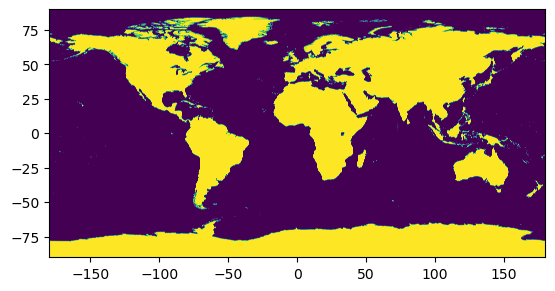

<AxesSubplot: >

<Figure size 640x480 with 0 Axes>

In [88]:
from rasterio.plot import show

ax3 = show((pop_raster, 1))

buffer_gdf.plot(ax=ax3, color='red', alpha=0.5, edgecolor='black', linewidth=2)

other_shapefile.plot(ax=ax3, color='blue', alpha=0.5,
                     edgecolor='black', linewidth=2)





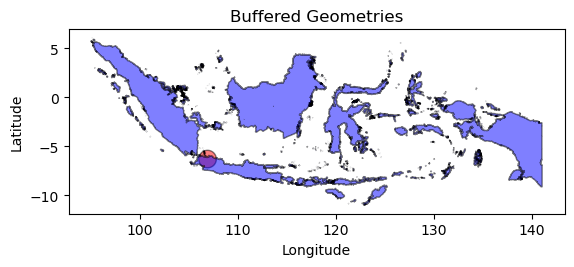

In [77]:
result = perform_zonal_statistics(
    point, 'C:Users/mwarizmiwafiq/Downloads/Compressed/landscan-global-2021-assets/landscan-global-2021.tif')

print(result)

C:\Users\mwarizmiwafiq\AppData\Local\Temp\ipykernel_26784\1383043556.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_gdf = point_gdf.buffer(1)


[{'sum': -37907334232833.0}]


-2147483647.0
[{'min': 0.0, 'max': 64290.0, 'mean': 1711.8149144165425, 'sum': 47104011.0, 'median': 447.0}]
